In [13]:
## Data description
### The xlsx file contained 2 importance sheets: conversation_1 and conversation_2

Each sheet has 7 columns:
    
    - 'customer'    : Text from customer 
    
        - note: the word "action_outside" declared customer had taken some action outside the Facebook messager (commented on the post,..) after that, the shop wrote some responses.
        
    - 'shop',       : Text from shop.
    
    - 'label',      : id of customer and name of shop.
    
    - 'fixed_time', : the date and time that the action is took place.
    
    - 'stl',        : aka (second to last), time in second between the current text and the text on the upper row.
    
    - 'str_ttl',    : same as above but in better format.
    
    - 'cat'         : label
        - cat == start_conversation : the moment started that conversation
        


SyntaxError: invalid syntax (<ipython-input-13-cfdd09b926a7>, line 4)

## Tasks

    - Performing data analysis:
        
        - Which information you can extract from that data ?
        
        - Show me the insight you can get in the way non-tech person can understand what you are doing.

    - Build a customer profile

**Note: Please write clean-clear code, comments on your code and also annotation on figures/charts (if any)!**

In [48]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

excel_file_path = 'conversations.xlsx'
xls = pd.ExcelFile(excel_file_path)

In [49]:
# Function to visualize word frequency of customers
def plotWordFrequency(sheet, column, plot_title, additional_unnecessary_words=None):
    if additional_unnecessary_words is None:
        additional_unnecessary_words = []

    df = pd.read_excel(xls, sheet)
    df[column] = df[column].str.lower()
    word_count = df.customer.str.split(expand=True).stack().value_counts()

    # read stop words from file
    with io.open("vn_stopwords.txt", "r", encoding="utf-8") as my_file:
        vn_stopwords = my_file.read()
    vn_stopwords = vn_stopwords.splitlines()
    unnecessary_words = ['url', 'u', 'e', 'o', 'a', 'i', 'c', 'b', 'la', 'giup', 'oi', 'gui', 'nhg', 'chi', 'minh',
                         'shop',
                         'lam', 'tam', 'nhat', 'dung', 'mua', 'co', 'ko',
                         'a?',
                         'ko?', 'ok', '1', '2', '3', '4', 'dc', 'ạ?', ]
    all_unnecessary_words = vn_stopwords + unnecessary_words + additional_unnecessary_words

    # remove all unnecessary words from word_count
    word_count = word_count.drop(all_unnecessary_words, errors='ignore')
    word_count = word_count[word_count > 3]

    # word_count.hist()
    word_count.plot.barh()
    plt.suptitle(plot_title)
    plt.ylabel('Words')
    plt.yticks(fontsize=8)
    plt.xlabel('Frequency')
    plt.figure(figsize=(10, 100))
    plt.show()

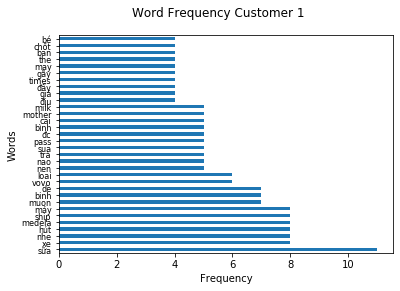

<Figure size 720x7200 with 0 Axes>

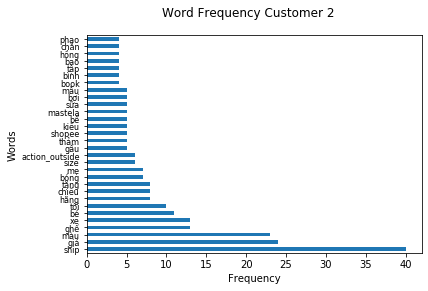

<Figure size 720x7200 with 0 Axes>

In [50]:
additional_unnecessary_words = ['t', 'có', 'nhé', 'ko', 'cho', 'ơi', 'mình', 'này', 'lấy', 'k', 'còn',
                                'bạn',
                                'bn', 'tớ', 'thanh', 'm', 'là', '.', 'ah', 'làng', 'dãy', 'đi', 'báo', 'máy', 'châu',
                                'giúp',
                                '15', 'ui', 'nhá', 'quây', 'j', 'x', 'bên', 'cái', 'ah', 'luôn', '2', 'nữa', 'số',
                                'ntnao',
                                'dchi', 'ơn', 'r', 'km', 'kia', 'trc', '1m32', 'pha', 'góc', 'í', '-', '?', 'sz', 'sợ',
                                'oki',
                                '0936875999', '+', 'hình', 'ck', 'alo', 'mấy', 'hộ', 'món', 'kệ', 'cảm', '&', 'ngô',
                                'bí',
                                'nhé.', 'hà', 'việt', 'đồ', 'âu', 'thước', '16a7', '1c', 'hả', 'kích']
#
plotWordFrequency('0', 'customer', 'Word Frequency Customer 1 ')
plotWordFrequency('1', 'customer', 'Word Frequency Customer 2', additional_unnecessary_words)

In [51]:
# Từ biểu đồ trên:
#   - Đối với khách hàng thứ nhất: Những từ được khách hàng này nhắc tới nhiều nhất là "sữa", "xe", "medela", "ship", "máy",
#       "bình", "vovo". Vì vậy có thể nhận định rằng khách có nhu cầu cao với những sản phẩm liên quan tới sữa của cửa hàng như 
#       máy hút sữa, bình sữa, etc. Loại sản phẩm thứ 2 mà khách có nhắc tới nhiều là xe đẩy em bé. Bên cạnh đó khách hàng cũng
#       ưa chuộng sản phẩm của nhãn hiệu Medala và Vovo hơn so vỡi những nhãn hiệu khác
    
#   - Đối với khách hàng thứ hai: Khác với khách hàng thứ nhất, những từ được nhắc đến nhiều là "giá", "xe", "ghế". Khách quan
#       tâm nhiều tới những sản phẩm là xe đẩy và ghế cho em bé, về màu săc khach hàng chỉ nhắc tới màu hông. Vậy khách hàng
#       thứ hai ngoài chọn sản phẩm dựa trên nhãn hiệu mà còn dựa trên giá tiền và màu sắc.
        
#   - Từ "ship" được cả 2 khách hàng nhắc tới nhiều vậy nhu cầu cần chuyển hàng tới tận nhà của các khách hàng cũng cần được 
#      lưu ý
        

In [52]:
def calculateAverageWaitTime(sheet, plot_title, max_time=9999999999):
    df = pd.read_excel(xls, sheet)

    # Get stl column dataz
    customer_wait_time = df.loc[df['label'] == "Shop Gấu & Bí Ngô - Đồ dùng Mẹ & Bé cao cấp", 'stl']
    customer_wait_time = customer_wait_time[
        customer_wait_time <= max_time]  # remove periods that are too big in difference with the rest
    average_wait_time = customer_wait_time.mean()
    average_wait_time = round(average_wait_time, 2)

    customer_wait_time_with_date = df.loc[
        df['label'] == "Shop Gấu & Bí Ngô - Đồ dùng Mẹ & Bé cao cấp", ['fixed_time', 'stl']]
    customer_wait_time_with_date = customer_wait_time_with_date[
        customer_wait_time_with_date['stl'] <= max_time]  # remove periods that are too big in difference with the rest

    # customer_wait_time_with_date.plot(x='fixed_time', y='stl')
    customer_wait_time_with_date.plot.scatter(x='fixed_time', y='stl', c="DarkBLue")
    plt.suptitle(plot_title)
    plt.xlabel('Date')
    plt.ylabel('Wait time (seconds)')
    plt.figtext(.55, .8, "Average Wait Time:" + str(average_wait_time) + "s")
    plt.xticks(rotation=35)
    plt.show()

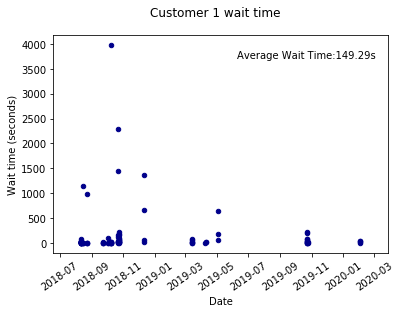

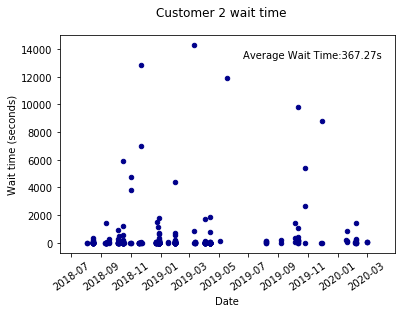

In [53]:
calculateAverageWaitTime('0', "Customer 1 wait time", 3977)
calculateAverageWaitTime('1', "Customer 2 wait time", 14291)

In [54]:
# Thời gian trung bình mà khách hàng 1 đợi cho tới khi cửa hàng trả lời là 149s
# Thời gian trung bình mà khách hàng 2 đợi cho tới khi cửa hàng trả lời là 367s